In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Prepare data

In [2]:
df = None

# for i in range(1, 33):
#     filename = '16-06-2022/until-32-threads/master-' + str(i) + '-threads.csv'
for i in range(1, 65):
    filename = '16-06-2022/until-64-threads/master-' + str(i) + '-threads.csv'
    new_data = pd.read_csv(filename)
    new_data['threads'] = i
    new_data['branch'] = 'master'
    df = pd.concat([df, new_data], ignore_index = True)

single_core_df = df[df['threads'] == 1]
multi_core_df = df[df['threads'] > 1]

speedups = {'name': [], 'speedup': [], 'cores': []}

for algorithm in set(df['name']):
    algorithm_single_core_df = single_core_df[single_core_df['name'] == algorithm]
    single_core_mean = algorithm_single_core_df['cpu_time_us'].mean()
    
    for thread in set(multi_core_df['threads']):
        algorithm_multi_core_df = multi_core_df[(multi_core_df['name'] == algorithm) &
                                                (multi_core_df['threads'] == thread)]
        
        # should we divide the multi_core_mean by the number of threads?
        multi_core_mean = algorithm_multi_core_df['cpu_time_us'].mean() / thread
        
        speedup = single_core_mean / multi_core_mean

        speedups['name'].append(algorithm)
        speedups['speedup'].append(speedup)
        speedups['cores'].append(thread)

        
df = pd.DataFrame(data=speedups)
df.sample(10)

,name,speedup,cores
197,QuickSort,8.135455,10
487,NBody sequential,44.625702,48
244,QuickSort,13.236136,57
278,FrogJump,11.908310,28
470,NBody sequential,29.514765,31
386,MergeSort,8.165158,10
30,NBody parallel reduce,5.023061,32
365,Life - sequential generation,51.471849,52
114,Travelling Salesman Problem,24.715031,53
121,Travelling Salesman Problem,25.952346,60


## Plot speedup curves

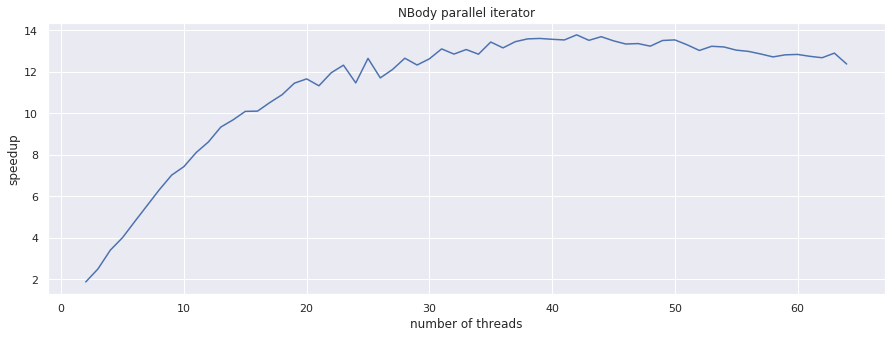

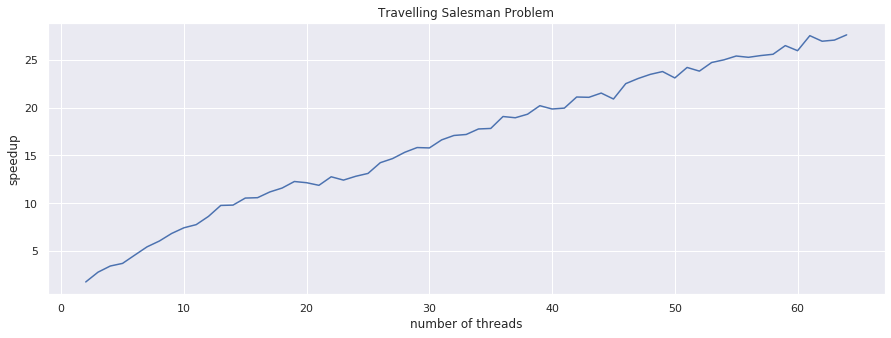

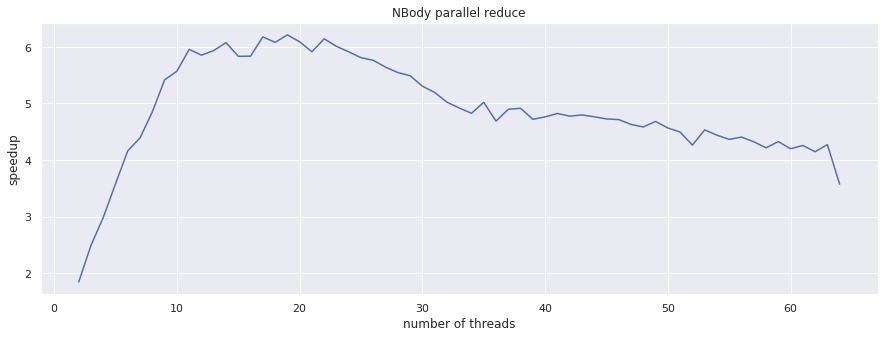

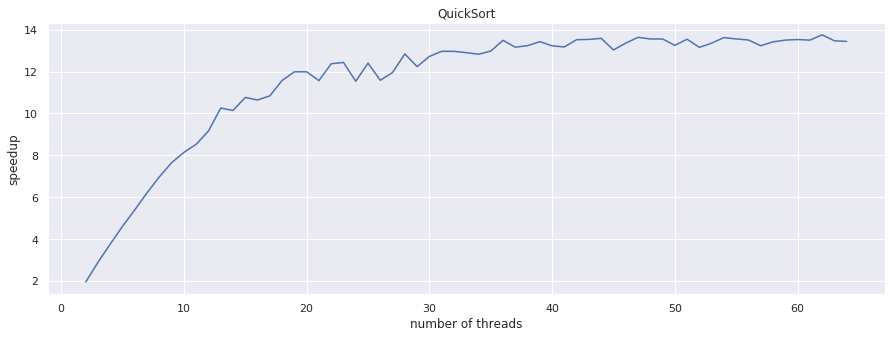

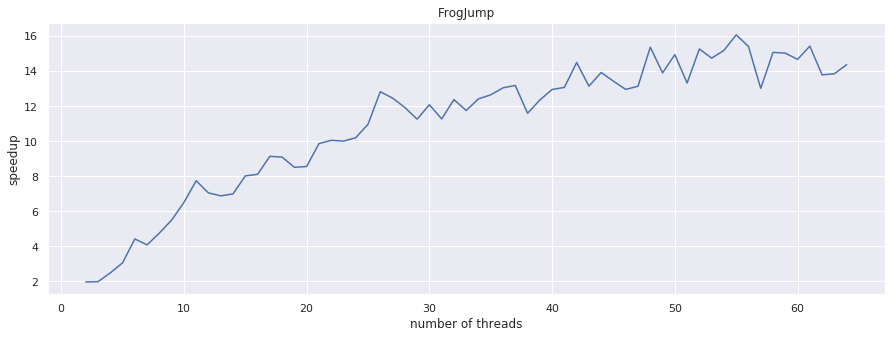

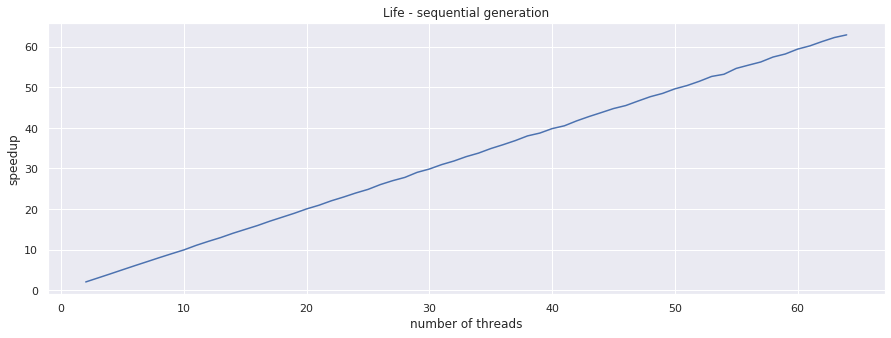

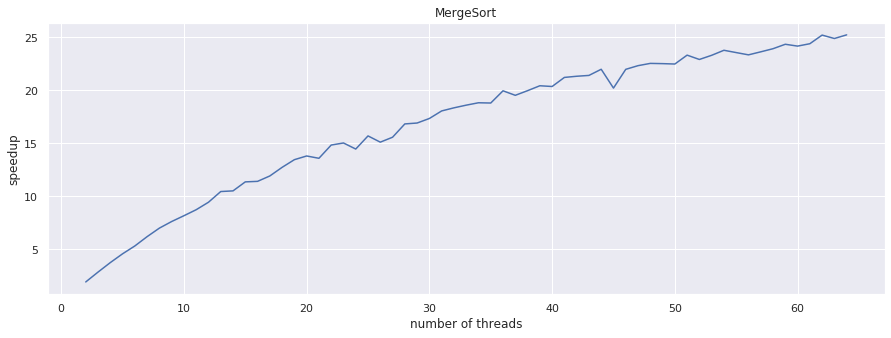

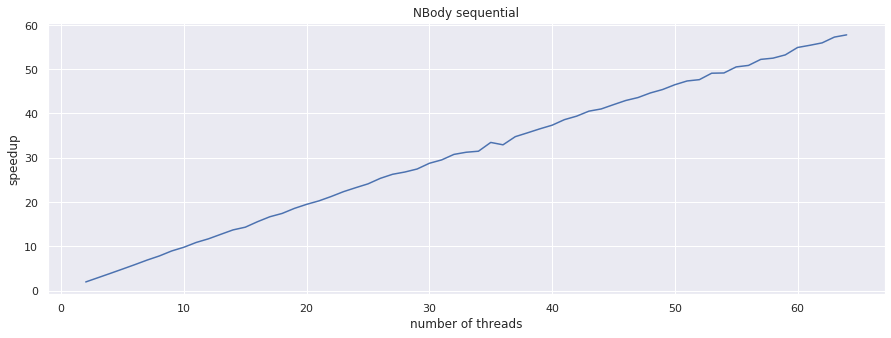

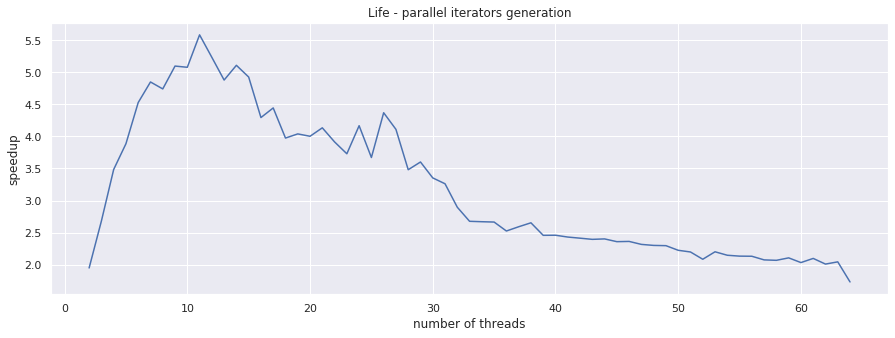

In [3]:
for algorithm in set(df['name']):
    fig, ax = plt.subplots(figsize=(15, 5))
    df_to_plot = df[df['name'] == algorithm]
    sns.lineplot(x='cores', y='speedup', data=df_to_plot, ax=ax);
    
    ax.set_title(algorithm)
    ax.set_ylabel('speedup')
    ax.set_xlabel('number of threads')